In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import os
import re
import sqlite3 as sl
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
con = sl.connect('tweets')
corpus2 = pd.read_sql("""
                    SELECT tweet_text, is_there_an_emotion_directed_at_a_brand_or_product
                    FROM tweets
                    WHERE tweet_text != 'None'
                    AND is_there_an_emotion_directed_at_a_brand_or_product IN ('Positive emotion','Negative emotion')
                    AND tweet_text NOT like 'RT%'
                    """,con)
corpus2.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [3]:
corpus2.shape

(2875, 2)

In [4]:
full = pd.read_sql("""
                   SELECT count(tweet_text), is_there_an_emotion_directed_at_a_brand_or_product
                   FROM tweets
                   GROUP BY is_there_an_emotion_directed_at_a_brand_or_product
                   """,con)
full

,count(tweet_text),is_there_an_emotion_directed_at_a_brand_or_product
0,156,I can't tell
1,570,Negative emotion
2,5388,No emotion toward brand or product
3,2978,Positive emotion


In [5]:
no_RT = pd.read_sql("""
                    SELECT count(tweet_text), is_there_an_emotion_directed_at_a_brand_or_product
                    FROM tweets
                    WHERE is_there_an_emotion_directed_at_a_brand_or_product IN ('Positive emotion','Negative emotion')
                    AND tweet_text NOT like 'RT%'
                    GROUP BY is_there_an_emotion_directed_at_a_brand_or_product
                    """,con)
no_RT

,count(tweet_text),is_there_an_emotion_directed_at_a_brand_or_product
0,474,Negative emotion
1,2401,Positive emotion


In [6]:
pos_neg = pd.read_sql("""
                    SELECT count(tweet_text), is_there_an_emotion_directed_at_a_brand_or_product
                    FROM tweets
                    WHERE is_there_an_emotion_directed_at_a_brand_or_product IN ('Positive emotion','Negative emotion')
                    GROUP BY is_there_an_emotion_directed_at_a_brand_or_product
                    """,con)
pos_neg

,count(tweet_text),is_there_an_emotion_directed_at_a_brand_or_product
0,570,Negative emotion
1,2978,Positive emotion


In [7]:
RT = pd.read_sql("""
                    SELECT count(tweet_text), is_there_an_emotion_directed_at_a_brand_or_product
                    FROM tweets
                    WHERE tweet_text like 'RT%'
                    GROUP BY is_there_an_emotion_directed_at_a_brand_or_product
                    """,con)
RT

,count(tweet_text),is_there_an_emotion_directed_at_a_brand_or_product
0,22,I can't tell
1,96,Negative emotion
2,1282,No emotion toward brand or product
3,577,Positive emotion


In [8]:
no_rt_pos_neg = pd.read_sql("""
                    SELECT count(tweet_text), is_there_an_emotion_directed_at_a_brand_or_product
                    FROM tweets
                    WHERE is_there_an_emotion_directed_at_a_brand_or_product IN ('Positive emotion','Negative emotion')
                    AND tweet_text NOT like 'RT%'
                    GROUP BY is_there_an_emotion_directed_at_a_brand_or_product
                    """,con)
no_rt_pos_neg

,count(tweet_text),is_there_an_emotion_directed_at_a_brand_or_product
0,474,Negative emotion
1,2401,Positive emotion


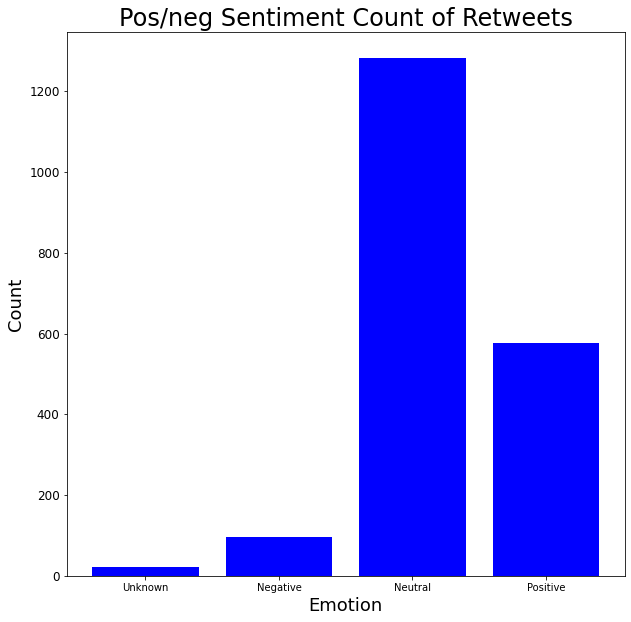

In [9]:
import seaborn as sns

x = RT['is_there_an_emotion_directed_at_a_brand_or_product']
y = RT['count(tweet_text)']

plt.figure(figsize=(10,10))
plt.bar(x,y,color = 'blue')
plt.xlabel('Emotion', fontsize=18)
plt.xticks(np.arange(4), ['Unknown', 'Negative', 'Neutral', 'Positive']) # Set text labels.fontsize=12, rotation = 45, )
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Pos/neg Sentiment Count of Retweets', fontsize = 24);

In [13]:
no_prod = pd.read_sql("""
                    SELECT count(*), emotion_in_tweet_is_directed_at
                    FROM tweets
                    GROUP BY emotion_in_tweet_is_directed_at
                    """,con)
no_prod

,count(*),emotion_in_tweet_is_directed_at
0,5802,None
1,78,Android
2,81,Android App
3,661,Apple
4,430,Google
5,35,Other Apple product or service
6,293,Other Google product or service
7,946,iPad
8,470,iPad or iPhone App
9,297,iPhone


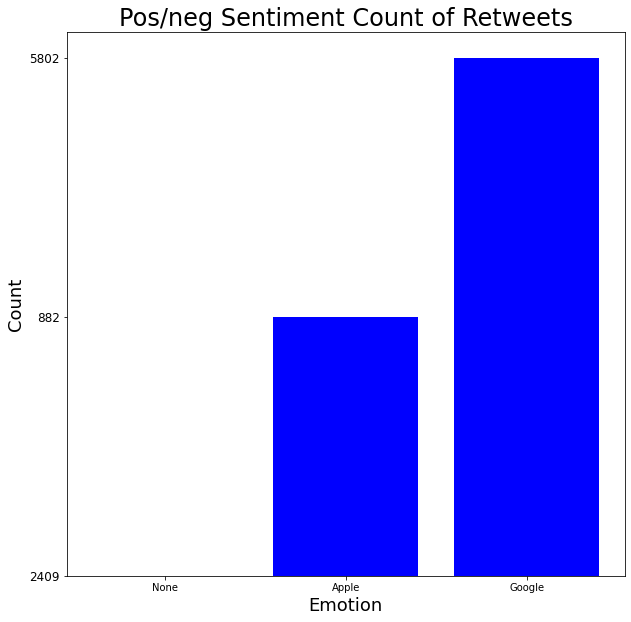

In [15]:
x = ['None', 'Apple', 'Google']
y = ['2409','882','5802']

plt.figure(figsize=(10,10))
plt.bar(x,y,color = 'blue')
plt.xlabel('Emotion', fontsize=18)
# plt.xticks(np.arange(10), ['Unknown', 'Android', 'App-Android', 'Apple','Google','Other Apple','Other Google', 'iPad','App-Apple', 'iPhone']) # Set text labels.fontsize=12, rotation = 45, )
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Pos/neg Sentiment Count of Retweets', fontsize = 24);

In [ ]:
A